#I-94 Interstate highway#

The goal of this project is to find out the indicators of heavy traffic on I-94

In [1]:
import pandas as pd
traffic=pd.read_csv('Metro_Interstate_Traffic_Volume.csv', encoding='Latin-1')
print(traffic.head())
print(traffic.tail())
print(traffic.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

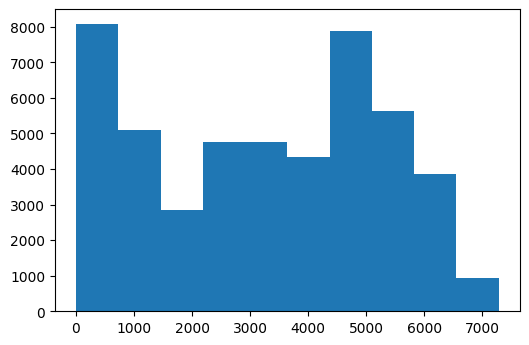

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(traffic['traffic_volume'])
plt.show()
traffic['traffic_volume'].describe()

In [3]:
import datetime as dt
traffic['date_time']=pd.to_datetime(traffic['date_time'])
day_hour=traffic.copy()[(traffic['date_time'].dt.hour >=7) & (traffic['date_time'].dt.hour < 19)]
night_hour=traffic.copy()[(traffic['date_time'].dt.hour >=19) | (traffic['date_time'].dt.hour <7)]
print(day_hour.shape)
print(night_hour.shape)

(23877, 9)
(24327, 9)


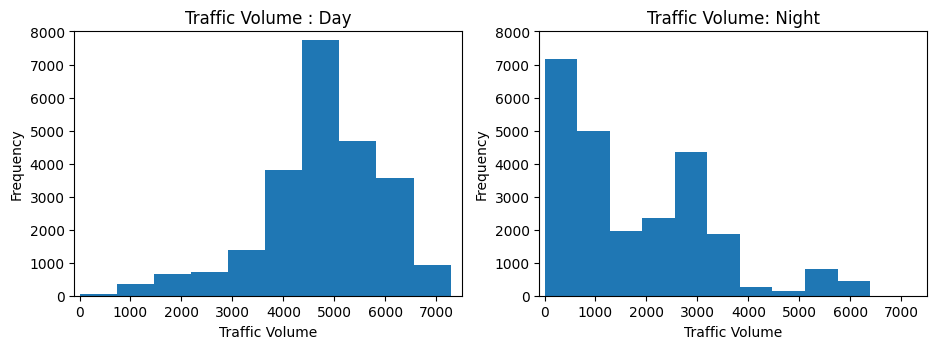

Day hour:  count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
Night hour:  count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


In [4]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(day_hour['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Traffic Volume : Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')


plt.subplot(1,2,2)
plt.hist(night_hour['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Traffic Volume: Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

print('Day hour: ', day_hour['traffic_volume'].describe())
print('Night hour: ', night_hour['traffic_volume'].describe())

Day hour has the left skewed and 75% of time are over 5559 pass the station. Night hour is a right skewed and 75% of time are less than 2819.

In [5]:
traffic['month'] = traffic['date_time'].dt.month
by_month = traffic.groupby('month').mean()
by_month['traffic_volume']

month
1     3051.081378
2     3197.945547
3     3308.388611
4     3304.372388
5     3366.319432
6     3419.077413
7     3205.481752
8     3394.241891
9     3303.049334
10    3390.678376
11    3167.592784
12    3024.257943
Name: traffic_volume, dtype: float64

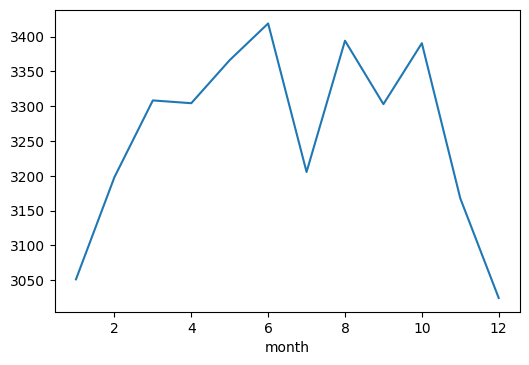

In [6]:
by_month['traffic_volume'].plot.line(x='month',y='traffic_volume')
plt.show()

In June, August and October have the peak and reach to around 3400. The traffic volume is low in winter time.

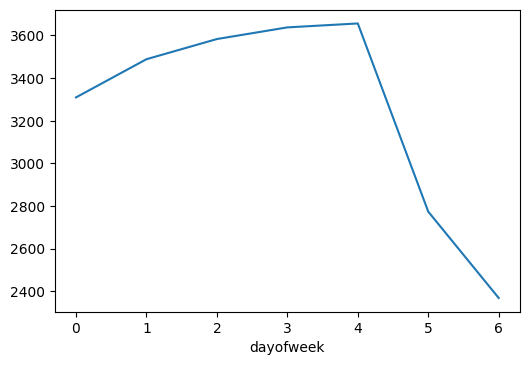

In [7]:
traffic['dayofweek'] = traffic['date_time'].dt.dayofweek
by_dayofweek = traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] 
by_dayofweek['traffic_volume'].plot.line()
plt.show()

The traffic volume is higher at weekday and reach to the peak with 3600 on Friday. The amount drops massively in weekend with 2800 on Saturday and 2400 on Sunday.

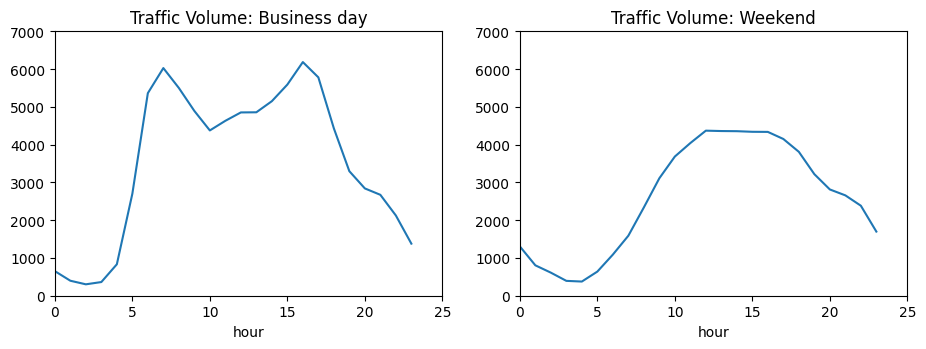

In [8]:
traffic['hour']=traffic['date_time'].dt.hour
business_days=traffic.copy()[traffic['dayofweek'] <= 4]
weekend = traffic.copy()[traffic['dayofweek'] >=5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(11,3.5))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic Volume: Business day')
plt.xlim(0,25)
plt.ylim(0,7000)

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic Volume: Weekend')
plt.xlim(0,25)
plt.ylim(0,7000)
plt.show()


At business day, there's high traffic volume in communting hour(7:30am & 4:30pm) while the peak in weekend is between 11am to 4pm. This is the time people go out for entertainment and leisure activities in weekend.

In [13]:
traffic.corr()['traffic_volume']

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
month            -0.002533
dayofweek        -0.149544
hour              0.352401
Name: traffic_volume, dtype: float64

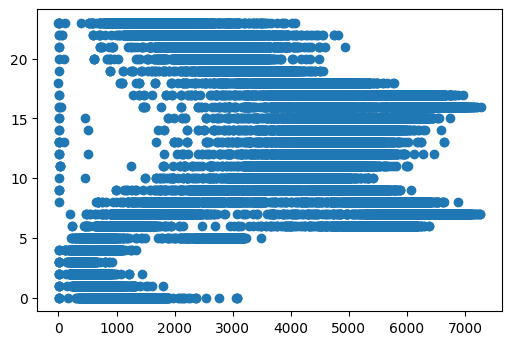

In [16]:
plt.scatter(traffic['traffic_volume'],traffic['hour'])
plt.show()

In [26]:
by_weather_main = traffic.groupby('weather_main').mean()
by_weather_description = traffic.groupby('weather_description').mean()

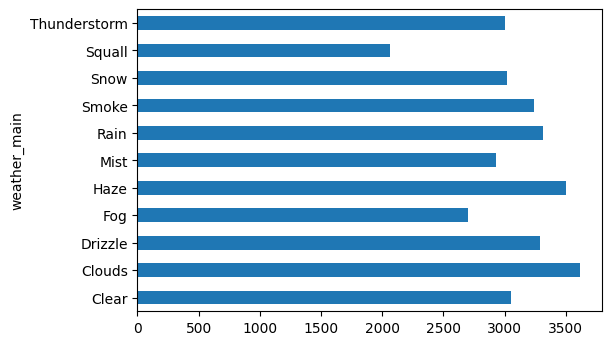

In [27]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

It indicated that clouds and haze weather have heavy traffic volume with more than 3500. When the weather is squall, fog, the volume is low between 2000 to 3000.

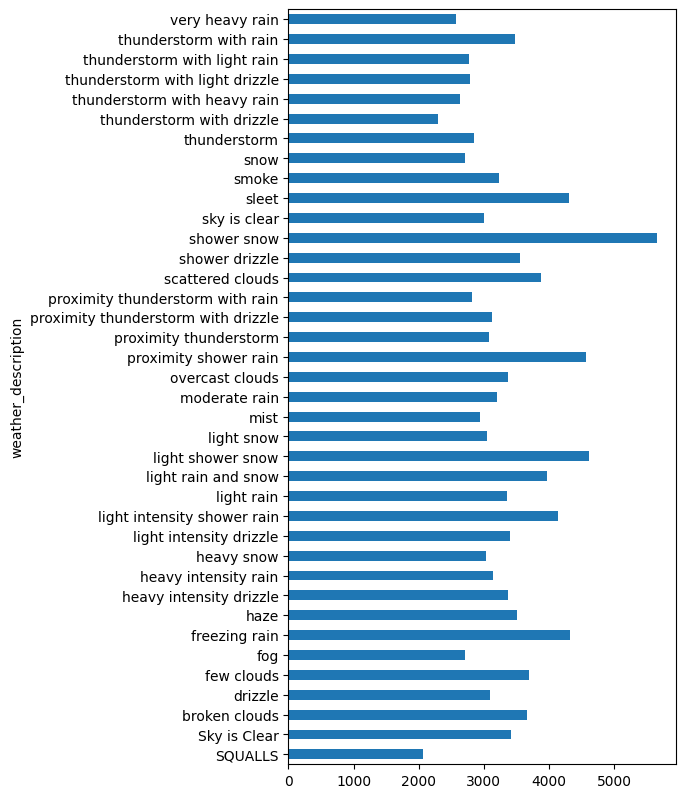

In [34]:
plt.figure(figsize=(5,10))
by_weather_description['traffic_volume'].plot.barh()
plt.show()

It shows that shower snow has high traffic volume which is more than 5000.When the weather is fog or thunderstorm with dizzle, the traffic volume is low with less than 2000.